In [16]:
# plot this as a function of beta
#(5 - beta)^2 + 3beta^2
import numpy as np
beta = np.linspace(-10, 10, 1000)
y = 5
lam = 3
ridge = (y - beta)**2 + lam * beta**2

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

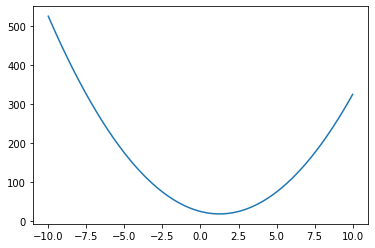

In [18]:
plt.plot(beta, ridge)


In [19]:
# min from plot
beta[np.argmin(ridge)]

1.2512512512512508

In [20]:
# min from 6.14
y / (1 + lam) # confirmed!

1.25

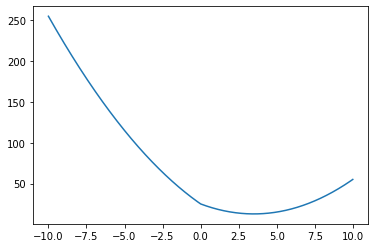

In [21]:
beta = np.linspace(-10, 10, 1000)
y = 5
lam = 3
lasso = (y - beta)**2 + lam * abs(beta)
plt.plot(beta, lasso)

In [22]:
beta[np.argmin(lasso)]


3.493493493493494

In [23]:
# min from 6.15
# since y > lambda / 2 minimum should be at y - lambda / 2
y - lam / 2 # confirmed!

3.5

In [24]:
x = np.random.randn(100)
err = np.random.randn(100)

In [25]:
beta0, beta1, beta2, beta3 = -5, 1, 4, 3
y = beta0 + beta1 * x + beta2 * x ** 2 + beta3 * x ** 3 + err

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from itertools import combinations

In [27]:
from collections import OrderedDict


In [28]:
OrderedDict({'b': 1, 'a':534})


OrderedDict([('b', 1), ('a', 534)])

In [29]:
df = pd.DataFrame({'x1': x, 'x2': x ** 2, 'x3': x**3, 'x4': x**4,'x5': x**5,
                   'x6': x**6,'x7': x**7,'x8': x**8,'x9': x**9,'x9_10': x**10,
                   'y':y})

In [30]:
df.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x9_10,y
0,-0.357939,0.128120,-0.045859,0.016415,-0.005875,0.002103,-0.000753,0.000269,-0.000096,3.452138e-05,-5.132391
1,-0.237001,0.056170,-0.013312,0.003155,-0.000748,0.000177,-0.000042,0.000010,-0.000002,5.591254e-07,-4.084418
2,1.022387,1.045275,1.068675,1.092599,1.117059,1.142066,1.167633,1.193773,1.220498,1.247821e+00,2.046640
3,0.226220,0.051176,0.011577,0.002619,0.000592,0.000134,0.000030,0.000007,0.000002,3.510081e-07,-5.305778
4,0.449984,0.202486,0.091115,0.041001,0.018450,0.008302,0.003736,0.001681,0.000756,3.403871e-04,-4.472108


In [31]:
lr = LinearRegression()


In [32]:
X = df.iloc[:, :-1]
y = df['y']

In [33]:
lr.fit(X, y)


LinearRegression()

In [34]:
sigma2 = np.sum((lr.predict(X) - y) ** 2) / len(X)


In [39]:
# best subset selection
n = len(X)
cp = []
bic = []
adj_r2 = []
for i in range(1, 11):
    current_cp = []
    current_bic = []
    current_adj_r2 = []
    for comb in combinations(range(10), i):
        X = df.iloc[:, comb]
        lr.fit(X, y)
        rss = np.sum((lr.predict(X) - y) ** 2)
        tss = np.sum((y - y.mean()) ** 2)
        d = len(comb)
        current_cp.append(1/n * (rss + 2 * d * sigma2))
        current_bic.append(1/n * (rss + np.log(n) * d * sigma2))
        current_adj_r2.append(1 - rss / (n - d - 1) * (n - 1) / tss)
        
    cp.append(min(current_cp))
    bic.append(min(current_bic))
    adj_r2.append(max(current_adj_r2))

IndexingError: Too many indexers

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

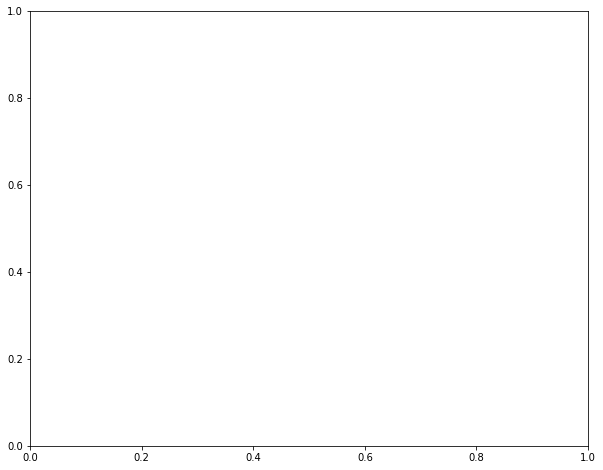

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), cp)
plt.plot(range(1, 11), bic)
plt.title("CP and BIC Best subset");

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

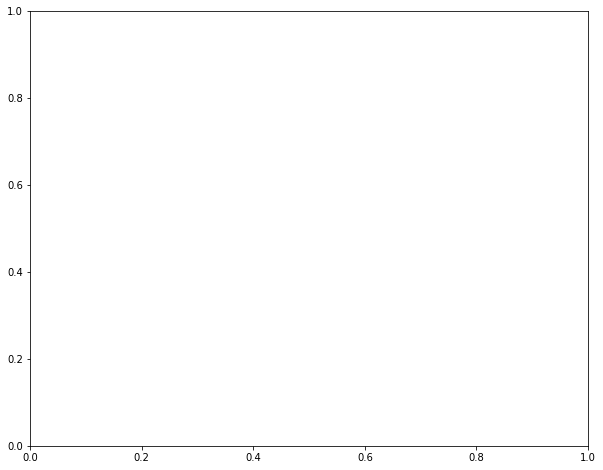

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), adj_r2)
plt.title("Adjusted R^2");

In [ ]:
# all three agree on correct model!
np.argmin(cp), np.argmin(bic), np.argmax(adj_r2)

ValueError: attempt to get argmin of an empty sequence

In [ ]:
cp


In [ ]:
# forward selection. Looks at Cp each step and stops if it can't beat old best
current_vars = []
best_cp = 10000000
prev_cp = best_cp
best_cp = 1000000
while best_cp < prev_cp:
    prev_cp = best_cp
    old_vars = current_vars.copy()
    for i in range(10):
        if i in current_vars:
            continue
        X = df.iloc[:, old_vars + [i]]
        lr.fit(X, y)
        rss = np.sum((lr.predict(X) - y) ** 2)
        d = len(old_vars) + 1
        cur_cp = 1/n * (rss + 2 * d * sigma2)
        if cur_cp < best_cp:
            current_vars = old_vars + [i]
            best_cp = cur_cp

In [ ]:
current_vars


In [ ]:
best_cp


In [ ]:
old_vars.


In [ ]:
# backward selection. Looks at Cp each step and stops if it can't beat old best
current_vars = list(range(10))
best_cp = 10000000
prev_cp = best_cp
best_cp = 1000000
while best_cp < prev_cp:
    prev_cp = best_cp
    old_vars = current_vars.copy()
    for i in range(10):
        if i not in current_vars:
            continue
        old_vars2 = old_vars.copy()
        old_vars2.remove(i)
        X = df.iloc[:, old_vars2]
        lr.fit(X, y)
        rss = np.sum((lr.predict(X) - y) ** 2)
        d = len(old_vars) + 1
        cur_cp = 1/n * (rss + 2 * d * sigma2)
        if cur_cp < best_cp:
            current_vars = old_vars2.copy()
            best_cp = cur_cp

In [ ]:
current_vars # same answer for backward selection


In [ ]:
X = df.iloc[:, :-1]


In [40]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Lasso

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [41]:
X_stand = X / X.std()


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_stand, y)


NameError: name 'train_test_split' is not defined

In [ ]:
alphas = np.linspace(.0001, .1, 1000)
errors = []
for alpha in alphas:
    ls = Lasso(alpha, max_iter=100000, tol=.0001)
    ls.fit(X_train, y_train)
    errors.append(np.mean((ls.predict(X_test) - y_test) ** 2))

In [ ]:
plt.plot(alphas, errors)


In [ ]:
np.argmin(errors)


In [ ]:
alphas[53]


In [ ]:
ls = Lasso(alpha=.0054, max_iter=100000, tol=.0001)
ls.fit(X_stand, y)

In [ ]:
ls.intercept_, ls.coef_


In [ ]:
# beta 3 was very far off
beta0, beta1, beta2, beta3

In [ ]:
beta0_7 = 3
beta7 = -1

In [ ]:
y_7 = beta0_7 + beta7 * x ** 7 + err


In [ ]:
df_7 = pd.DataFrame({'x1': x, 'x2': x ** 2, 'x3': x**3, 'x4': x**4,'x5': x**5,
                   'x6': x**6,'x7': x**7,'x8': x**8,'x9': x**9,'x9_10': x**10,
                   'y':y_7})

In [ ]:
plt.scatter(X['x7'], y_7)


In [ ]:
# best subset selection
X = df_7.iloc[:, :-1]
n = len(X)
tss = np.sum((y_7 - y_7.mean()) ** 2)
lr.fit(X,  y_7)
sigma2 = np.sum((lr.predict(X) - y_7) ** 2) / len(X)
cp = []
bic = []
adj_r2 = []
for i in range(1, 11):
    current_cp = []
    current_bic = []
    current_adj_r2 = []
    for comb in combinations(range(10), i):
        X = df_7.iloc[:, comb]
        lr.fit(X, y_7)
        rss = np.sum((lr.predict(X) - y_7) ** 2)
        
        d = len(comb)
        current_cp.append(1/n * (rss + 2 * d * sigma2))
        current_bic.append(1/n * (rss + np.log(n) * d * sigma2))
        current_adj_r2.append(1 - rss / (n - d - 1) * (n - 1) / tss)
        
    cp.append(min(current_cp))
    bic.append(min(current_bic))
    adj_r2.append(max(current_adj_r2))

In [ ]:
# best model is with one predictor
plt.plot(range(10), cp)
bic.append(min(current_bic))

In [ ]:
# lasso
X = df_7.iloc[:, :-1]
X_stand = X / X.std()
X_train, X_test, y_train, y_test = train_test_split(X_stand, y_7)

In [ ]:
alphas = np.linspace(.001, 50, 100)
errors = []
ls = Lasso(alpha, max_iter=1000000000, tol=.000001)

for alpha in alphas:
    ls = Lasso(alpha=alpha)
    ls.fit(X_train, y_train)
    errors.append(np.mean((ls.predict(X_test) - y_test) ** 2))

In [ ]:
plt.plot(alphas, errors)


In [ ]:
best_alpha = alphas[np.argmin(errors)]
best_alpha

In [ ]:
ls = Lasso(alpha=best_alpha, max_iter=100000, tol=.000001)
ls.fit(X_stand, y_7)

In [ ]:
# coefficient doesn't resemble model at all. but these have been scaled by
# their  std.  must divide by std
ls.coef_

In [ ]:
# that's better - very close to actual value of -1
ls.coef_ / X.std()

In [ ]:
# also look at intercept
ls.intercept_

In [ ]:
!ls


In [ ]:
college = pd.read_csv('data/college.csv')


In [ ]:
college['Private'].value_counts()


In [ ]:
college['private_yes'] = (college['Private'] == 'Yes') * 1


In [ ]:
X = college.iloc[:, 3:]


In [ ]:
y = college['Apps']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
# Error
np.mean((lr.predict(X_test) - y_test) ** 2)

In [ ]:
from sklearn.linear_model import RidgeCV


In [ ]:
X_std = X.iloc[:, :-1].std()


In [ ]:
X_std['private_yes'] = 1


In [ ]:
X_std


In [ ]:
rcv = RidgeCV(alphas=np.linspace(.01, 100, 1000), cv=10)
rcv.fit(X / X_std, y)